### Implementing a Affinity Propagation algorithm with sklearn

AffinityPropagation creates clusters by sending messages between pairs of samples until convergence. The main drawbacks of K-Means and similar algorithms are having to select the number of clusters, and choosing the initial set of points. Affinity Propagation, instead, takes as input measures of similarity between pairs of data points, and simultaneously considers all data points as potential exemplars. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges.

The algorithm requires us to provide two kinds of data:

1. Similarities between data points, representing how well-suited a point is to be another one’s exemplar. If there’s no similarity between two points, as in they cannot belong to the same cluster, this similarity can be omitted or set to -Infinity depending on implementation.
2. Preferences, representing each data point’s suitability to be an exemplar. 

This algorithm works in these 2 steps:

1. Calculating responsibilities: Responsibility r(i, k) reflects the accumulated evidence for how point k is to serve as the exemplar for point i, taking into account other potential exemplars for point i. Responsibility is sent from data point i to candidate exemplar point k.
2. Calculating availabilities: Availability a(i, k) reflects the accumulated evidence for how appropriate it would be for point i to choose point k as its exemplar, taking into account the support from other points that point k should be an exemplar. Availability is sent from candidate exemplar point k to point i.


Finally, we can have different stopping criteria to terminate the procedure, such as when changes in values fall below some threshold, or the maximum number of iterations is reached. At any point through Affinity Propagation procedure, summing Responsibility (r) and Availability (a) matrices gives us the clustering information we need.

##### Drawbacks of this algorithm:

The main drawback of Affinity Propagation is its complexity. The algorithm has a time complexity of the order O(N^2 T), where N is the number of samples and T is the number of iterations until convergence.
Further, the memory complexity is of the order O(N^2) if a dense similarity matrix is used, but reducible if a sparse similarity matrix is used. This makes Affinity Propagation most appropriate for small to medium sized datasets.

#### Dataset
Iris Plants Database:The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import affinity_propagation
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as sm
% matplotlib inline

In [42]:
# read the iris data
data = pd.read_csv("data/iris.csv")
data.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
# get the number of datapoints in iris dataset
data.shape

(150, 5)

In [44]:
# separate class label from features
features=data.loc[:,data.columns != "class"]
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
labels= data['class']
labels.head()
labels=LabelEncoder().fit_transform(labels)


#### Visualise the data
Before we run Kmeans algorithm on this data, its important to have a look at the data. We will do this by plotting two scatter plots. One looking at the Sepal values and another looking at Petal. We will also set it to use some colours so it is clearer.

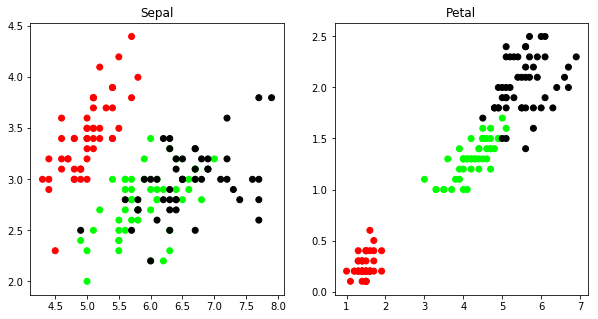

In [46]:

# Set the size of the plot
plt.figure(figsize=(10,5))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(features.sepal_length, features.sepal_width, c=colormap[labels])
plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(features.petal_length, features.petal_width, c=colormap[labels])
plt.title('Petal')

As we can see from the above graph, both sepal and petal feature separate one class very clearly, but two other classes overlap.

#### Apply Affinity propagation Algorithm

Input to algoithm:

preference : array-like, shape (n_samples,)
Preferences for each point - points with larger values of preferences are more likely to be chosen as exemplars. The number of exemplars, ie of clusters, is influenced by the input preferences value. If the preferences are not passed as arguments, they will be set to the median of the input similarities.

affinity : string, optional, default=``euclidean``.
euclidean uses the negative squared euclidean distance between points.

Output:

cluster_centers_indices_ :array, shape (n_clusters,).Indices of cluster centers

labels_:array, shape (n_samples,).Labels of each point


In [67]:
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(features)
cluster_centers_indices = af.cluster_centers_indices_
pred = af.labels_

n_clusters_ = len(cluster_centers_indices)


In [68]:
print('Estimated number of clusters: %d' % n_clusters_)


Estimated number of clusters: 3


#### Visualise the results
Lets plot the actual classes against the predicted classes for petal feature from the K Means model.

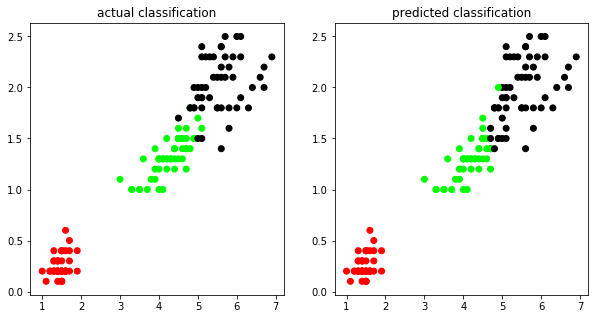

In [72]:
# Set the size of the plot
plt.figure(figsize=(10,5))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# actual classification
plt.subplot(1, 2, 1)
plt.scatter(features.petal_length, features.petal_width, c=colormap[labels])
plt.title('actual classification')
 
# predicted classification
plt.subplot(1, 2, 2)
plt.scatter(features.petal_length, features.petal_width, c=colormap[pred])
plt.title('predicted classification')

From the above graph we can see,Affinity progation based on our preferneces generated three clusters with one class(in red) is completed predicted correctly(put into a cluster), while other 2 classes are not separated that much.In result was expected, because as we had seen in earlier graph that few features of those two class overlap.Hence, no matter what preferences we choose, we will end up getting diffrent clusters and few observation in wrong cluster for two classes.

#### Accuracy

There are a number of ways in which we can measure a classifiers performance.We will calculate the accuracy and also the confusion matrix.We need to values 'labels' which is the true (original) values and 'labels_' which are the models values.

In [73]:
# calculate Accuracy
print("Accuracy",sm.accuracy_score(labels,pred))


Accuracy 0.926666666667


### The model is 93% accurate.

Another way to mesaure accuracy is by creating Confusion matrix, which indicates how many instances of each class is correctly classified and how many got wrong classified.

In [74]:
# Confusion Matrix
sm.confusion_matrix(labels, pred)

array([[50,  0,  0],
       [ 0, 41,  9],
       [ 0,  2, 48]])

As we can see, one of the class is completely predicted correctly and other two classes instances were put into wrong clusters.But compared to KMeans, this algorithm performed better on this data.Also,cluster number was self dtermined in affinity propagation

References:

https://www.toptal.com/machine-learning/clustering-algorithms

http://scikit-learn.org/stable/modules/clustering.html